In [1]:
# Import necessary libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import utm
from sklearn.cluster import KMeans

In [2]:
# Get London Map
img = plt.imread("londonMap.png")

# Lower left corner location in latitude and longitude
LowLeftCorner = [51.482296, -0.210712]
# Upper Right corner location
TopRightCorner = [51.536054, -0.058373];

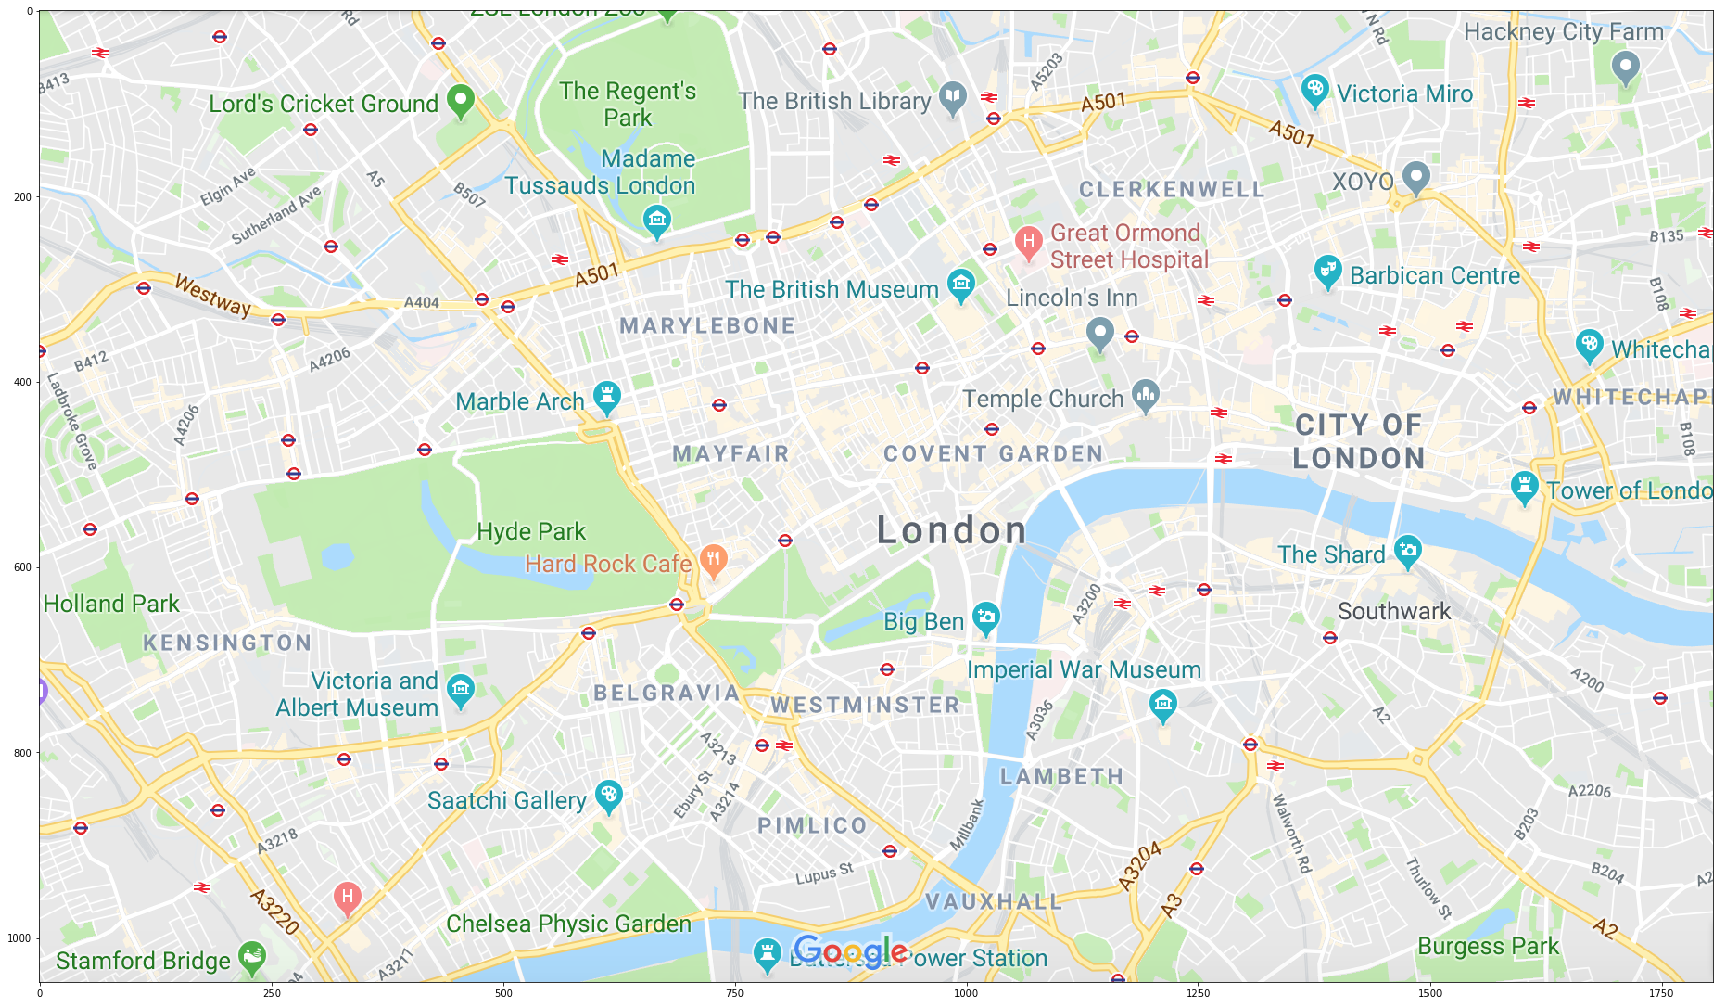

In [3]:
# Create figure and show map
fig,ax = plt.subplots(figsize=(30,20))
ax.set_aspect('equal')

ax.imshow(img);

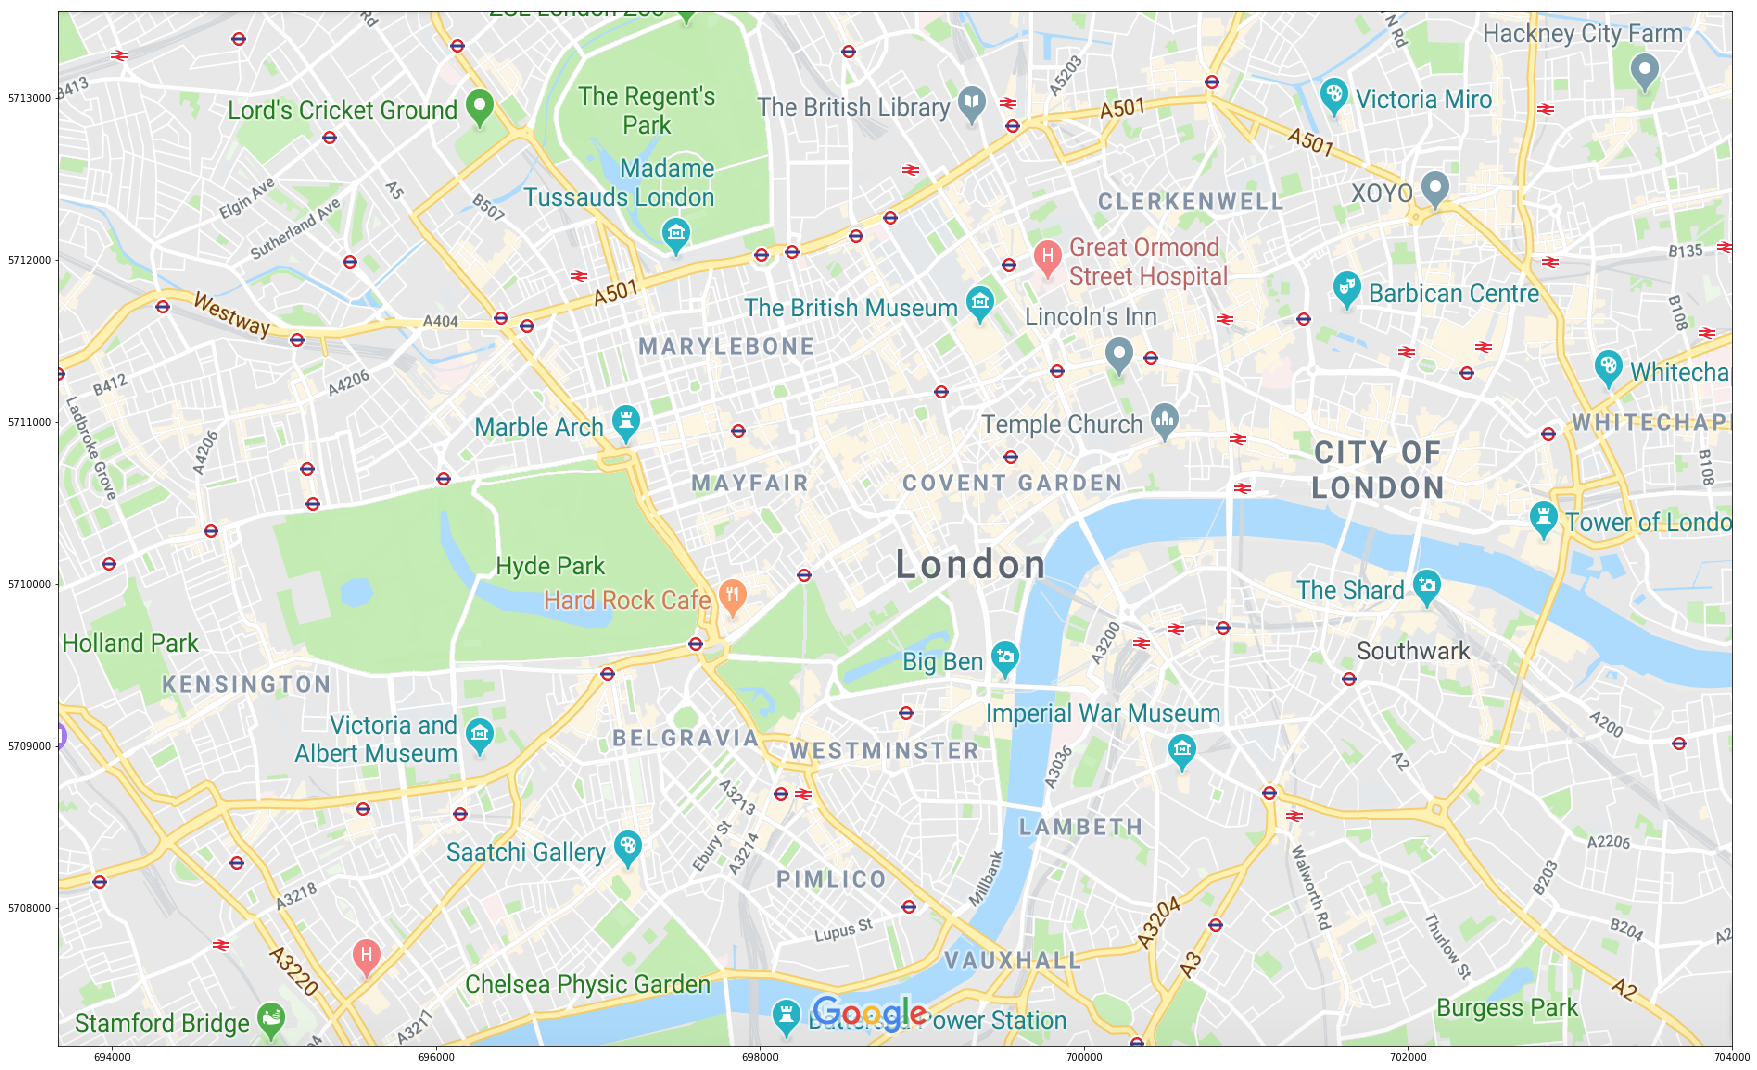

In [4]:
# Create figure
fig,ax = plt.subplots(figsize=(30,20))
ax.set_aspect('equal')

# This will allow to fix the axis of our map, by defining it in terms of UTM units (meters)
# This is achieved by converting latitude and longitude in UTM
ax.imshow(img, interpolation='none', 
          extent=[utm.from_latlon(LowLeftCorner[0], LowLeftCorner[1])[0],
                  utm.from_latlon(TopRightCorner[0], TopRightCorner[1])[0],
                  utm.from_latlon(LowLeftCorner[0], LowLeftCorner[1])[1],
                  utm.from_latlon(TopRightCorner[0], TopRightCorner[1])[1]] )

# Show London map with axis fixed
plt.show()

In [5]:
# Main attractions in London (Latitude, Longitude)
attractions = [ [51.500700, -0.124642], # Big Ben
                [51.512987, -0.124161], # Covent Garden
                [51.508919, -0.128300], # National Gallery
                [51.507975, -0.128004], # Trafagal Square
                [51.510097, -0.134132], # Piccadily Circus
                [51.507835, -0.087758], # London Bridge
                [51.517578, -0.096793], # Museum of London
                [51.504419, -0.086431], # The Shard
                [51.505404, -0.091092], # Borough Market
                [51.496684, -0.176689], # National History Museum
                [51.497768, -0.174622], # Science Museum
                [51.496539, -0.172306], # Victoria and Albert Museum
                [51.500852, -0.177447], # Royal Albert Hall
                [51.506921, -0.165562], # Hyde Park
                [51.501197, -0.141840], # Buckingam Palace
                [51.501839, -0.140435], # Victoria Memorial
                [51.490962, -0.127746], # Tate Britain
                [51.490605, -0.158655], # Saatchi Gallery
                [51.499226, -0.127271], # Westminster Abbey
                [51.499660, -0.124536], # Palace of Westminster
                [51.503255, -0.119560], # London Eye
                [51.513707, -0.098225], # St Paul Cathedral
                [51.519261, -0.126955], # The British Museum
                [51.542481, -0.147563], # Camden Market
                [51.523009, -0.079677], # Schoreditch
                [51.508052, -0.075756], # Tower of London
                [51.511100, -0.083498], # Sky Garden
                [51.522901, -0.154379], # Madame Tussaud
                [51.523701, -0.158522], # Sherlock Homes House
                [51.518622, -0.165671], # Windsor Castle
                [51.530977, -0.155599], # Regent's Park
                [51.502905, -0.203895], # Holland Park
                [51.481636, -0.190884], # Stamford Bridge
                [51.499151, -0.162667], # Harrods
                [51.506614, -0.116550], # South bank
                [51.502002, -0.134858], # St James Park
                [51.508062, -0.097210], # Shakespear Globe
                [51.510986, -0.117223], # Somerset House
                [51.511609, -0.127966], # Leicester Square
                [51.509984, -0.134233], # Piccadilly Circus
                [51.514909, -0.145060], # Oxford Street
                [51.505769, -0.188327], # Kensington Palace
                [51.507607, -0.099344], # Tate Modern
            ]

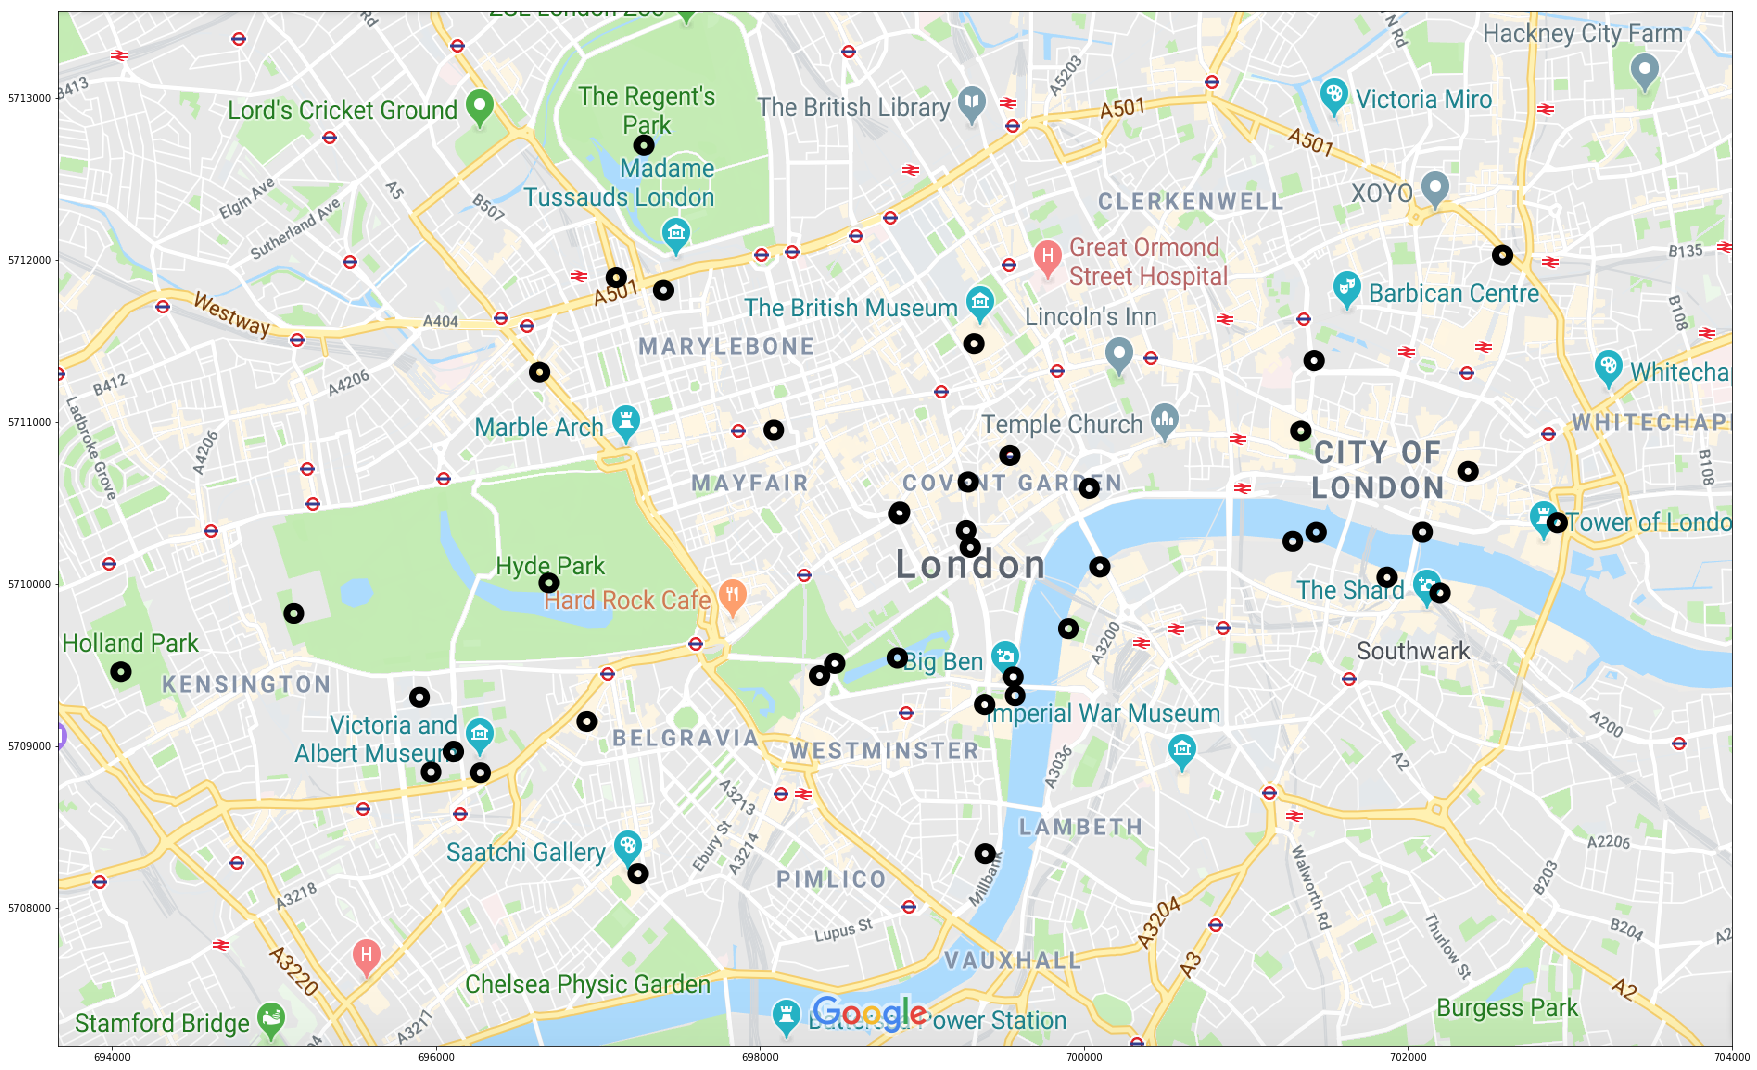

In [6]:
# Create figure
fig,ax = plt.subplots(figsize=(30,20))
ax.set_aspect('equal')
ax.imshow(img, interpolation='none', 
          extent=[utm.from_latlon(LowLeftCorner[0], LowLeftCorner[1])[0],
                  utm.from_latlon(TopRightCorner[0], TopRightCorner[1])[0],
                  utm.from_latlon(LowLeftCorner[0], LowLeftCorner[1])[1],
                  utm.from_latlon(TopRightCorner[0], TopRightCorner[1])[1]] )

# Loop through main attractions and plot their locations in London Map
for i in range(0,len(attractions)):
    if attractions[i][0]>LowLeftCorner[0] and attractions[i][0]<TopRightCorner[0] and attractions[i][1]>LowLeftCorner[1] and attractions[i][1]<TopRightCorner[1]:
        x = utm.from_latlon(attractions[i][0], attractions[i][1])[0]
        y = utm.from_latlon(attractions[i][0], attractions[i][1])[1]
        ax.scatter(x, y, s=200, edgecolors='black', facecolors='none', linewidth=7)

# Show London map
plt.show()

In [13]:
# Select number of days to visit London
daysInLondon = 3

# Perform K-means algorithm
kmeans = KMeans(n_clusters=daysInLondon, random_state=0).fit(attractions)

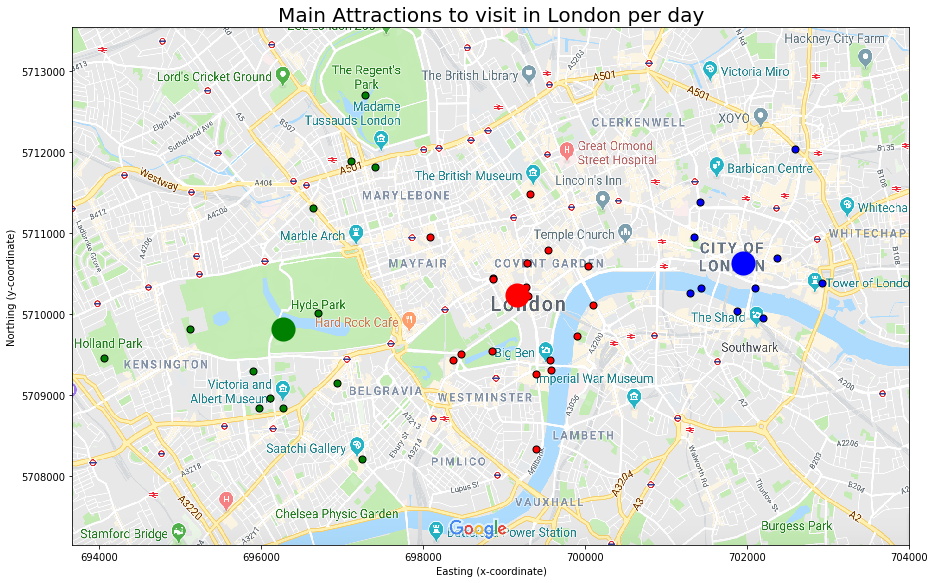

In [14]:
# Create figure
fig,ax = plt.subplots(figsize=(15,10))
ax.set_aspect('equal')
im=ax.imshow(img, interpolation='none', 
          extent=[utm.from_latlon(LowLeftCorner[0], LowLeftCorner[1])[0],
                  utm.from_latlon(TopRightCorner[0], TopRightCorner[1])[0],
                  utm.from_latlon(LowLeftCorner[0], LowLeftCorner[1])[1],
                  utm.from_latlon(TopRightCorner[0], TopRightCorner[1])[1]] )

colors = ['red','green','blue', 'purple', 'cyan'];

# Loop through main attractions and plot their locations in London Map with the color of the day of visit
for i in range(0,len(attractions)) :
    if attractions[i][0]>LowLeftCorner[0] and attractions[i][0]<TopRightCorner[0] and attractions[i][1]>LowLeftCorner[1] and attractions[i][1]<TopRightCorner[1]:
        x = utm.from_latlon(attractions[i][0], attractions[i][1])[0]
        y = utm.from_latlon(attractions[i][0], attractions[i][1])[1]
        ax.scatter(x, y, s=50, edgecolors='black',facecolors=colors[kmeans.labels_[i]], linewidth=1)

# Add the cluster center to show around what area you will wander
for i in range(0,len(kmeans.cluster_centers_)):
    x_center = utm.from_latlon(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1])[0]
    y_center = utm.from_latlon(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1])[1]
    ax.scatter(x_center, y_center, s=200, facecolors=colors[i], cmap = colors[i], linewidth=10)

plt.title('Main Attractions to visit in London per day', size=20)
plt.xlabel('Easting (x-coordinate)')
plt.ylabel('Northing (y-coordinate)')
    
# Show resulting London Map
plt.show()